In [1]:
import torch
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from transformers import AutoTokenizer

In [2]:
tokenizer = AutoTokenizer.from_pretrained("imthanhlv/gpt2news")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [2]:
# !gdown https://drive.google.com/uc?id=1u3GZerBV2eDq_aWxpTyDOIAgC-jfcVpG
# !unzip viecap_clean.zip

Downloading...
From: https://drive.google.com/uc?id=1u3GZerBV2eDq_aWxpTyDOIAgC-jfcVpG
To: /home/lethanh/workspace/vlsp_viecap4h_gptteam_code/data/viecap_clean.zip
100%|██████████████████████████████████████| 12.8M/12.8M [00:00<00:00, 21.5MB/s]


In [3]:
viecap_ds = torch.load("./viecap_clean/viecap_dedup_full.pt")
print(viecap_ds.keys())

dict_keys(['clip_embedding', 'target', 'ids', 'label'])


In [4]:
ic_embedding = viecap_ds['clip_embedding']
ic_text = viecap_ds['label']

In [5]:
sat_train_small = torch.load("./text_sat_b16_train.pt")

tcmalloc: large alloc 6178832384 bytes == 0x55e345cec000 @  0x7f7a3c64d680 0x7f7a3c66e824 0x7f7a3c66eb8a 0x7f79ddef125e 0x7f79ddef29d2 0x7f7a1ff0d8ed 0x7f7a30b277be 0x7f7a3076d8be 0x55e33ac39f76 0x55e33abf785f 0x55e33ac45fa1 0x55e33abba77f 0x55e33ac44f9f 0x55e33ac45943 0x55e33abb8b84 0x55e33ac44f9f 0x55e33ac45943 0x55e33ab382d6 0x55e33abf7e1e 0x7f7a3a2a12dd 0x7f7a3a29e188 0x55e33ac29e6a 0x55e33abba75e 0x55e33ac44f9f 0x55e33ac45943 0x55e33abf7041 0x55e33ac7c99b 0x55e33ac44a92 0x55e33ac45943 0x55e33abba77f 0x55e33ac44a92
tcmalloc: large alloc 3089416192 bytes == 0x55e4b8e9a000 @  0x7f7a3c64d680 0x7f7a3c66e824 0x7f7a3c66eb8a 0x7f79ddef125e 0x7f79ddef29d2 0x7f7a1ff0d8ed 0x7f7a30b277be 0x7f7a3076d8be 0x55e33ac39f76 0x55e33abf785f 0x55e33ac45fa1 0x55e33abba77f 0x55e33ac44f9f 0x55e33ac45943 0x55e33abb8b84 0x55e33ac44f9f 0x55e33ac45943 0x55e33ab382d6 0x55e33abf7e1e 0x7f7a3a2a12dd 0x7f7a3a29e188 0x55e33ac29e6a 0x55e33abba75e 0x55e33ac44f9f 0x55e33ac45943 0x55e33abf7041 0x55e33ac7c99b 0x55e33ac4

## Filter first by similarity with ic

In [6]:
sat_train_small.keys()

dict_keys(['clip_embedding', 'target'])

In [7]:
sate = sat_train_small['clip_embedding'].numpy()

In [8]:
sim = cosine_similarity(ic_embedding, sate)

tcmalloc: large alloc 12357656576 bytes == 0x55e5710e6000 @  0x7f7a3c64d680 0x7f7a3c66e824 0x7f79dd5e14ce 0x7f79dd632c70 0x7f79dd632dd7 0x7f79dd633029 0x7f79dd635f4d 0x7f79dd636289 0x7f79dd6d7c71 0x55e33ac39f76 0x55e33abf785f 0x55e33ac7bb90 0x55e33ac44a92 0x55e33ac45943 0x55e33abba11a 0x55e33ac44f9f 0x55e33ac45943 0x55e33abba11a 0x55e33ac44f9f 0x55e33ac45943 0x55e33abb8b84 0x55e33ac44a92 0x55e33ac45943 0x55e33abb8b84 0x55e33ac44a92 0x55e33ac45754 0x55e33acd3edc 0x55e33ad09083 0x55e33abfa699 0x55e33abb8b84 0x55e33ac3edc9
tcmalloc: large alloc 12357656576 bytes == 0x55e853cc8000 @  0x7f7a3c64d680 0x7f7a3c66e824 0x7f79dd5e14ce 0x7f79dd632c70 0x7f79dd632dd7 0x7f79dd62c405 0x7f79dd6d7ee0 0x55e33ac39f76 0x55e33abf785f 0x55e33ac7bb90 0x55e33ac44f9f 0x55e33ac45943 0x55e33abba11a 0x55e33ac44f9f 0x55e33ac45943 0x55e33abba11a 0x55e33ac44a92 0x55e33ac45943 0x55e33abb8b84 0x55e33ac44a92 0x55e33ac45754 0x55e33acd3edc 0x55e33ad09083 0x55e33abfa699 0x55e33abb8b84 0x55e33ac3edc9 0x55e33ac7f363 0x55e33a

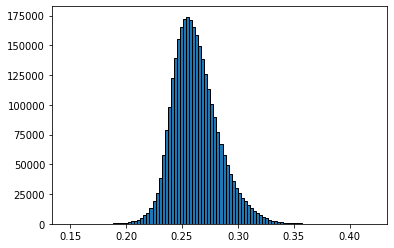

In [11]:
plt.hist(max_sim, bins=100, ec='k')
plt.title("")
plt.show()

In [10]:
max_sim = sim.max(axis=0)

In [12]:
np.quantile(max_sim, 0.995)

0.32764840700133335

In [13]:
r, c = np.where(sim > 0.327)
c = np.unique(c)
print(len(c))

similar_sentences = sat_train_small['target'].numpy()[[c]]

tcmalloc: large alloc 20624261120 bytes == 0x5611aab8e000 @  0x7f7a3c64d680 0x7f7a3c66e824 0x7f79dd5e14ce 0x7f79dd632c70 0x7f79dd632d58 0x7f79dd819a3f 0x7f79dd81b505 0x7f79dd81cc31 0x55e33abf785f 0x55e33abf7baa 0x55e33abf7e1e 0x7f79dd5e66bf 0x55e33abf9557 0x55e33ac7b060 0x55e33ac44a92 0x55e33ac45754 0x55e33acd3edc 0x55e33ad09083 0x55e33abfa699 0x55e33abb8b84 0x55e33ac3edc9 0x55e33ac7f363 0x55e33ac3edc9 0x55e33ac7f363 0x55e33ac3edc9 0x55e33ac2a1cd 0x55e33abba75e 0x55e33ac4586b 0x55e33abb8b84 0x55e33ac4586b 0x55e33abba75e


16061


/tmp/ipykernel_22239/356579023.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  similar_sentences = sat_train_small['target'].numpy()[[c]]


In [14]:
lengths = np.array([(i != 1).sum() for i in similar_sentences])

In [15]:
((lengths >= 5) & (lengths <= 63)).sum()

12539

In [218]:
tokenizer.decode(similar_sentences[28], skip_special_tokens=True)

'Sởi là một loại virus Có vỏ là các proteins, RNA, kèm theo một số proteins phục vụ sinh sản Virus sởi không thể tự sinh sản nó cần một tế bào chủ để làm giúp việc này'

In [18]:
# max length 64 tokens
# min length 5 tokens

In [16]:
selected = c[((lengths >= 5) & (lengths <= 63))]

In [17]:
len(selected)

12539

In [19]:
torch.tensor(sat_train_small['target'][[selected]][:, :64]).shape

/tmp/ipykernel_22239/2204455310.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(sat_train_small['target'][[selected]][:, :64]).shape


torch.Size([12539, 64])

In [20]:
torch.save({
    "clip_embedding": torch.tensor(sat_train_small['clip_embedding'][[selected]]),
    "target": torch.tensor(sat_train_small['target'][[selected]][:, :64])
}, "viecap_clean/sat_similar_full_0327.pt")

/tmp/ipykernel_22239/3839296753.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "clip_embedding": torch.tensor(sat_train_small['clip_embedding'][[selected]]),
/tmp/ipykernel_22239/3839296753.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "target": torch.tensor(sat_train_small['target'][[selected]][:, :64])


In [22]:
torch.save({
    "clip_embedding": torch.tensor(sat_train_small['clip_embedding'][[selected]][:5000] ),
    "target": torch.tensor(sat_train_small['target'][[selected]][:5000][:, :64])
}, "viecap_clean/train_sat_5k.pt")

t = torch.load("viecap_clean/train_sat_5k.pt")

print(t['clip_embedding'].shape)
print(t['target'].shape)


torch.Size([5000, 512])
torch.Size([5000, 64])


/tmp/ipykernel_22239/2837484012.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "clip_embedding": torch.tensor(sat_train_small['clip_embedding'][[selected]][:5000] ),
/tmp/ipykernel_22239/2837484012.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "target": torch.tensor(sat_train_small['target'][[selected]][:5000][:, :64])


In [23]:
torch.save({
    "clip_embedding": torch.tensor(sat_train_small['clip_embedding'][[selected]][5000:6000] ),
    "target": torch.tensor(sat_train_small['target'][[selected]][5000:6000][:, :64])
}, "viecap_clean/test_sat_1k.pt")

t = torch.load("viecap_clean/test_sat_1k.pt")

print(t['clip_embedding'].shape)
print(t['target'].shape)

torch.Size([1000, 512])
torch.Size([1000, 64])


/tmp/ipykernel_22239/3597643557.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "clip_embedding": torch.tensor(sat_train_small['clip_embedding'][[selected]][5000:6000] ),
/tmp/ipykernel_22239/3597643557.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "target": torch.tensor(sat_train_small['target'][[selected]][5000:6000][:, :64])


In [32]:
t = torch.load("./viecap_clean/test_viecap_1k.pt")

In [33]:
t.keys()

dict_keys(['clip_embedding', 'ids', 'target_sentence', 'target'])

In [34]:
t['target'].shape

(1000, 64)

In [35]:
t['clip_embedding'].shape

(1000, 512)

In [ ]:
torch.save({
    "clip_embedding": torch.tensor(t['clip_embedding']),
    "ids": t['ids'],
    "target_sentence": t['target_sentence'],
    "target": torch.tensor(t['target']),
}, "./viecap_clean/test_sat_1k.pt")

## Fix viecap dataset

In [3]:
!ls viecap_clean/

bk_test_viecap_1k.pt	  test_viecap_1k.pt   viecap_dedup_full.pt
sat_similar_full_0327.pt  train_sat_5k.pt
test_sat_1k.pt		  train_viecap_5k.pt


In [4]:
t = torch.load("./viecap_clean/train_viecap_5k.pt")

In [7]:
te = t['clip_embedding'].numpy()

In [11]:
np.unique(te, axis=0, ).shape

(4108, 512)